# PROBLEMA: ESTIMATIVA EXPERIMENTAL DA COMPLEXIDADE DE UMA FUNÇÃO DE UMA BIBLIOTECA

# Métodos de segmentação de imagens do tipo  Thresholding (Limiarização): 
> Divide uma imagem em regiões ou objetos binários com base em um valor de limiar. Bibliotecas: OpenCV, scikit-image.


## BIBLIOTECAS e FUNÇÕES

In [1]:
%matplotlib inline
#pip install -U scikit-learn
#pip install imagehash
#pip install -U matplotlib

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import colors

from sklearn.cluster import DBSCAN, KMeans

import seaborn as sns
sns.set()

from PIL import Image

import numpy as np
from numpy import mean
from numpy import isnan
from numpy import asarray

import os
import shutil, glob, os.path

from random import shuffle

from tqdm import tqdm

import math

import skimage
from skimage import data, io, color
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu 
from skimage.feature import canny 
from time import time
from random import randint
import cv2

from scipy import stats

from KMeans import KMeans
from tabulate import tabulate

In [2]:
def plotRegressao(x, y, titlex, titley):
    # Calcular a regressão linear -> primeira lternativa !!1
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    line = slope * np.array(x) + intercept
    
    # Calcular R^2 (coeficiente de determinação) e o coeficiente de correlação de Pearson
    r_squared = r_value ** 2
    pearson_coeficiente = r_value
    
    # Plotar os pontos e a linha de regressão linear
    plt.scatter(x, y, label='Pontos')
    plt.plot(x, line, color='red', label='Regressão Linear')
    
    # Adicionar título com R^2 e o coeficiente de correlação de Pearson
    titulo = f'Regressão Linear (R²={r_squared:.2f}, Pearson={pearson_coeficiente:.2f})'
    plt.title(titulo)
    # Adicionar legenda para a equação da linha
    plt.text(0.07, 0.5, f'{titley} = {slope:.2g}n + {intercept:.2g}', fontsize=12, transform=plt.gca().transAxes)
    
    # Adicionar legendas
    plt.xlabel(titlex)
    plt.ylabel(titley)
    plt.legend()
    
    # Exibir o gráfico
    plt.show()

## **2. Leitura das imagens na pasta**

files in directory:  C:\Users\duike\OneDrive\Documentos\Repositorios\EngenhariaDeProgramas\Experimentos\Credito2\FACES 
 ['branca01.jpg', 'branca02.jpg', 'branca03.jpg', 'casal_branco01.jpg', 'casal_moreno01.jpg', 'familia_branca01.jpg', 'familia_morena01.jpg', 'homem_branco01.jpg']

Selecionadas as  1 primeiras imagens

Imagem # 1 : branca01.jpg
resolução da imagem:  (553, 531, 3)
number of color channels:  3


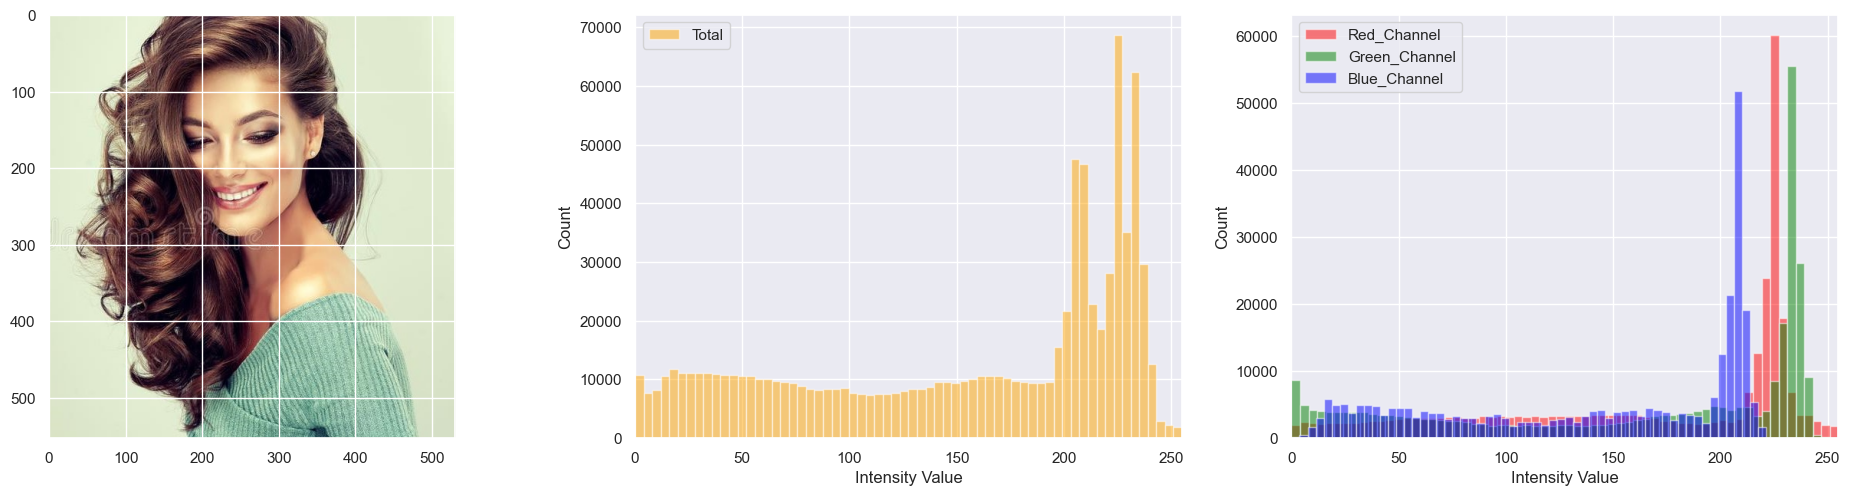

In [3]:
# PREPROCESSAMENTO DAS IMAGENS
INPUT_PATH = 'C:\\Users\\duike\\OneDrive\\Documentos\\Repositorios\\EngenhariaDeProgramas\\Experimentos\\Credito2\\FACES'
Files=os.listdir(INPUT_PATH)
print("files in directory: ",INPUT_PATH,"\n",os.listdir(INPUT_PATH))

Img=[]
img=[]
ncolors=[]
ResX=[]
ResY=[]
n=[]

nImg = 1 # mnumero de imagens a processar na ordem de leitura
print("\nSelecionadas as ",nImg,"primeiras imagens")
ctr = 1
for filename in Files[:nImg]: 
    if filename.endswith('.jpg') or filename.endswith('.png'): # filtro formato da imagem
        try:
            img.append(io.imread(INPUT_PATH+"/"+filename))#, as_gray=as_gray)) # open the image file
            print("\nImagem #",ctr,':',filename)
            ctr+=1
            print("resolução da imagem: ",img[-1].shape)
            Img.append(img[-1]) # backup of original images
            ncolors.append(img[-1].shape[-1])
            ResX.append(img[-1].shape[0])
            ResY.append(img[-1].shape[1])
            n.append(ResX[-1]*ResY[-1])
            print("number of color channels: ", ncolors[-1])
         
#             plt.style.use('grayscale')
#             if ncolors[-1]>1: # if it is RGB convert to grayscale
#                 img[-1]=np.round(255*rgb2gray(img[-1])) # foca = [1,2,0,2]
#             ncolors[-1]=1
            fig2, ax2 = plt.subplots(1,3, figsize=(24, 5.5))
            ax2[0].imshow(img[-1])
            ax2[1].hist(img[-1].ravel(), bins = 64, color = 'orange', alpha = 0.5)
            ax2[1].legend(['Total'])
            ax2[2].hist(img[-1][:, :, 0].ravel(), bins = 64, color = 'Red', alpha = 0.5)
            ax2[2].hist(img[-1][:, :, 1].ravel(), bins = 64, color = 'Green', alpha = 0.5)
            ax2[2].hist(img[-1][:, :, 2].ravel(), bins = 64, color = 'Blue', alpha = 0.5)
            ax2[2].legend(['Red_Channel', 'Green_Channel', 'Blue_Channel'])
            ax2[1].set_xlim(0, 255)
            ax2[1].set_xlabel('Intensity Value')
            ax2[1].set_ylabel('Count')
            ax2[2].set_xlim(0, 255)
            ax2[2].set_xlabel('Intensity Value')
            ax2[2].set_ylabel('Count')
            plt.show()
        except (IOError, SyntaxError) as e:
            print('Bad file:', filename)
            #os.remove(base_dir+"\\"+filename) (Maybe)


# 3. Realizando R repetições medindo o tempo do experimento de Clusterização de imagens com a implementação de KMeans, usando nImg imagens de resoluções distintas

n: [293643]
PROCESSAMENTO DA IMAGEM:  1
npOnes: [[-1.]
 [-1.]]
npOnes: [[-1.]
 [-1.]]
npOnes: [[-1.]
 [-1.]]
npOnes: [[-1.]
 [-1.]]
npOnes: [[-1.]
 [-1.]]
npOnes: [[-1.]
 [-1.]]
npOnes: [[-1.]
 [-1.]]
npOnes: [[-1.]
 [-1.]]
npOnes: [[-1.]
 [-1.]]
npOnes: [[-1.]
 [-1.]]
Média:  nan
Desvio Padrão:  nan
Variabilidade:  nan
Media de iterações:  nan


c:\Users\duike\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\duike\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Users\duike\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\duike\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\Users\duike\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rco

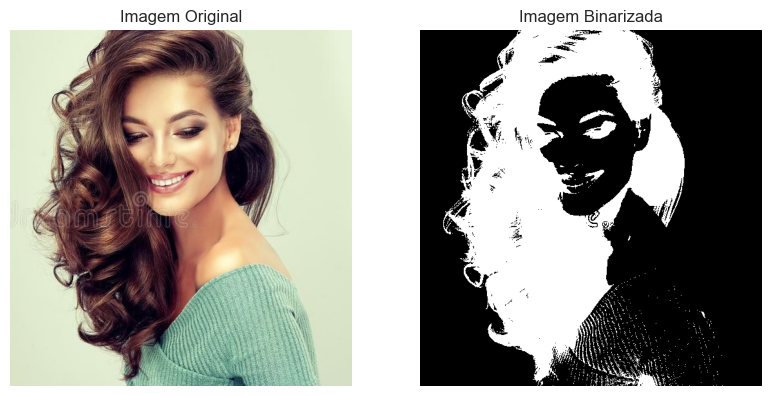

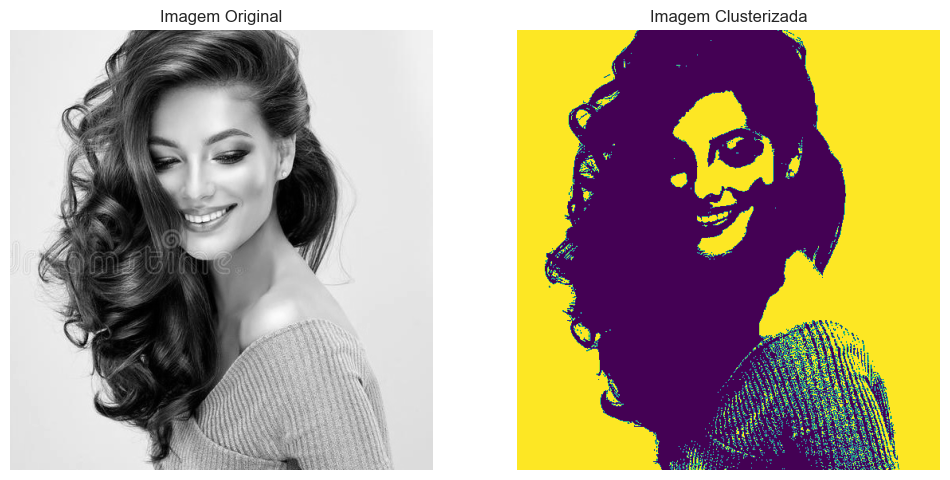

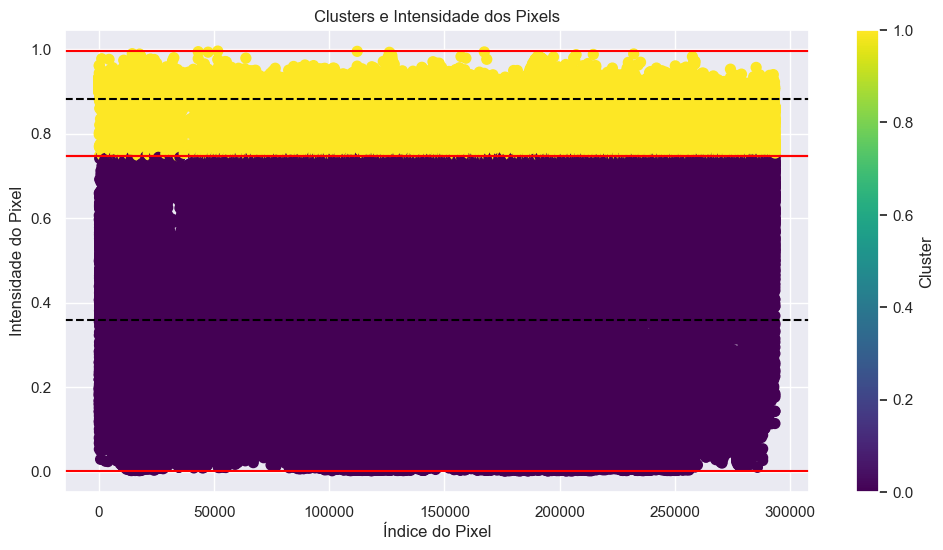

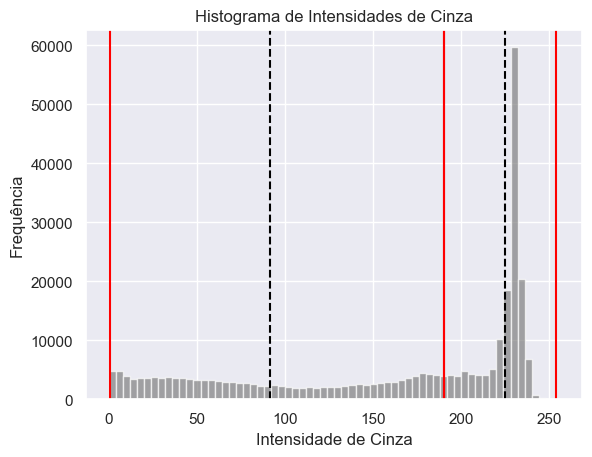

O Tempo para executar foi de  3.846575975418091  Segundos


In [4]:
from PIL import Image
from skimage import color
from skimage.filters import threshold_otsu
from time import time
import numpy as np
import matplotlib.pyplot as plt
from KMeans import KMeans

print("n:", n)
R = 10
ctr = 0
t = []
s = []
num_iteracoes = []
num_pixels = []

k = 2 # Configurar o número de clusters
tempo_inicial_experimento = time()
for image in Img[:nImg]:
    # Converter a imagem para escala de cinza
    print("PROCESSAMENTO DA IMAGEM: ", ctr + 1)
    T = []
    iteracoes_por_repeticao = []
    
    # REPETIÇÕES DO EXPERIMENTO--SEM PLOTAR-SÓ PARA MEDIR O TEMPO MEDIO--E CTRLE QLD <<<<
    for r in range(R):
        # Converter a imagem para escala de cinza
        bw_img = color.rgb2gray(image)

        # Achatar a imagem em uma matriz 2D para a clusterização
        X = bw_img.reshape(-1, 1)

        # Inicializar o KMeans e contar o tempo de execução
        tic = time()
        kmeans = KMeans(k=k, max_iters=1)
        clusters, centroids, fit_OK = kmeans.fit(X)
        toc = time()

        # Converter os clusters de volta para a forma original da imagem
        clustered_img = clusters.reshape(bw_img.shape)
       
        # Converter a imagem para escala de cinza e aplicar thresholding usando o método de Otsu
        limiar = threshold_otsu(bw_img)
        # Construir a máscara binarizada da imagem
        imagem_binarizada = bw_img > limiar

    # Gerar uma lista com os valores que não excedem K vezes a média
    num_iteracoes.append(np.mean(iteracoes_por_repeticao))
    t.append(np.mean(T))
    s.append(np.std(T))
    num_pixels.append(image.size)
    
    print("Média: ", np.mean(T))
    print("Desvio Padrão: ", np.std(T))
    print("Variabilidade: ", np.std(T)/np.mean(T))
    print("Media de iterações: ", np.mean(iteracoes_por_repeticao))

    # Plotar a imagem original, a imagem binarizada e a imagem clusterizada
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Imagem Original')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(imagem_binarizada, cmap='binary')
    plt.title('Imagem Binarizada')
    plt.axis('off')
    
    # Plotar os clusters
    kmeans.plot_clusters(bw_img, clusters)

    ctr += 1

tempo_final_experimento = time()
print("O Tempo para executar foi de ", tempo_final_experimento - tempo_inicial_experimento, " Segundos")

# 5. Determinando a função que ajusta os dados para estimar "experimentalmente" a complexidade do algoritmo

c:\Users\duike\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))


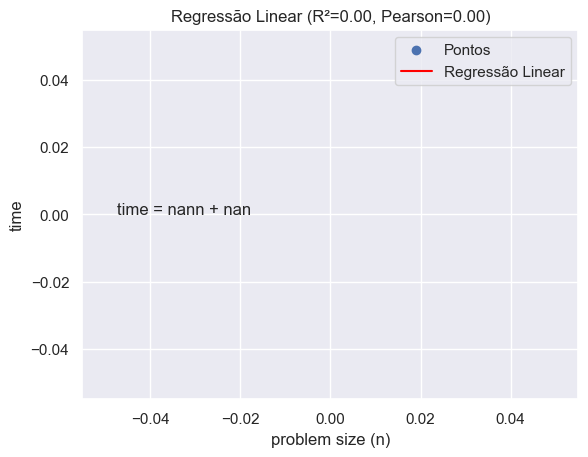

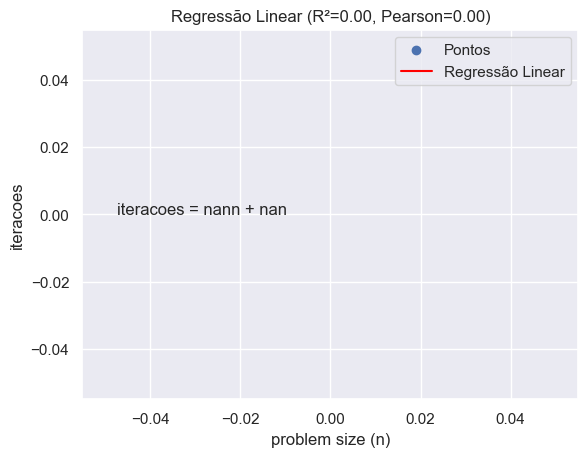

In [5]:
plotRegressao(n, t, "problem size (n)", "time")
plotRegressao(n, num_iteracoes,"problem size (n)",  "iteracoes")